In [4]:
import gym
import numpy as np
import time


def init_q(s, a, type="ones"):

    if type == "ones":
        return np.ones((s, a))
    elif type == "random":
        return np.random.random((s, a))
    elif type == "zeros":
        return np.zeros((s, a))


def epsilon_greedy(Q, epsilon, n_actions, s, train=False):

    if train or np.random.rand() < epsilon:
        action = np.argmax(Q[s, :])
    else:
        action = np.random.randint(0, n_actions)
    return action



def expected_sarsa(alpha, gamma, epsilon, episodes, max_steps, n_tests):
    data = []
    env = gym.make('Taxi-v3')
    n_states, n_actions = env.observation_space.n, env.action_space.n
    Q = init_q(n_states, n_actions, type="ones")
    timestep_reward = []
    for episode in range(episodes):
        #print(f"Episode: {episode}")
        total_reward = 0
        s = env.reset()
        t = 0
        done = False
        while t < max_steps:
            #if render:
            #env.render()
            t += 1
            a = epsilon_greedy(Q, epsilon, n_actions, s)
            s_, reward, done, info = env.step(a)
            total_reward += reward
            if done:
                Q[s, a] += alpha * ( reward  - Q[s, a] )
            else:
                expected_value = np.mean(Q[s_,:])
                # print(Q[s,:], sum(Q[s,:]), len(Q[s,:]), expected_value)
                Q[s, a] += alpha * (reward + (gamma * expected_value) - Q[s, a])
            s = s_
            if done:
                if True:
                    #print(f"This episode took {t} timesteps and reward {total_reward}")
                    data = data + [total_reward]
                
                timestep_reward.append(total_reward)
                break
    return timestep_reward, data


if __name__ =="__main__":
    alpha = 0.1
    gamma = 0.9
    epsilon = 0.9
    episodes = 1000
    max_steps = 2500
    n_tests = 20
    data = []
    timestep_reward, data = expected_sarsa(alpha, gamma, epsilon,
                                     episodes, max_steps, n_tests,
                                     )
    print(timestep_reward)

[-596, -560, -470, -560, -551, -335, -569, -605, -479, -506, -245, -236, -326, -290, -65, -497, -578, -227, -518, -254, -632, -434, -497, -230, -434, -371, -524, -326, -272, -227, -452, -42, -308, -362, -434, -632, -344, -236, -380, -326, -263, -254, -236, -263, -272, -308, -407, -353, -290, -236, -254, -344, -281, -151, -362, -290, -290, -443, -308, -317, -236, -254, -272, -263, -256, -263, -254, -344, -425, -335, -452, -272, -317, -290, -174, -443, -380, -317, -416, -299, -295, -272, -290, -344, -16, -272, -344, -299, -290, -290, -144, -308, -217, -281, -344, -157, -121, -171, -254, -290, -371, -308, -299, -299, -281, -74, -362, -272, -380, -308, -61, -293, -353, -308, -254, -353, -290, -51, -353, -299, -281, -335, -157, -157, -263, -488, -308, -299, -317, -290, -371, -70, -271, -254, -117, -245, -131, -371, -272, -26, -209, -308, -158, -326, -181, -245, -344, -252, -290, -272, -344, -389, -290, -290, -263, -167, -218, -263, -218, -1, -137, -326, -371, -362, -254, -353, -201, -299, -

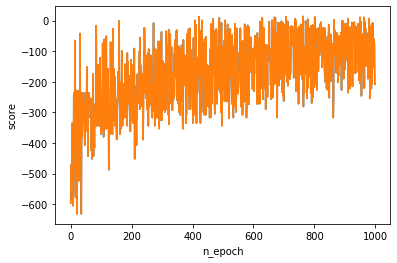

In [5]:
import matplotlib.pyplot as plt

plt.plot(data)
plt.plot(data)
plt.xlabel("n_epoch")
plt.ylabel("score")
plt.show()